# Predictive Maintainence
## Dataset Information:
Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of our knowledge.
## Attribute information:
The dataset consists of 10 000 data points stored as rows with 14 features in columns

UID: unique identifier ranging from 1 to 10000

product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as

product quality variants and a variant-specific serial number

air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K

process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.

rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise

torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.

tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure
## The machine failure consists of five independent failure modes
tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).

heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the tool's rotational speed is below 1380 rpm. This is the case for 115 data points.

power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.

overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.

random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail modes are true.

# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

In [9]:
def type_of_failure(row_name):
    if df.at[row_name, 'TWF'] == 1:
        df.at[row_name, 'type_of_failure'] = 'TWF'
    elif df.at[row_name, 'HDF'] == 1:
        df.at[row_name, 'type_of_failure'] = 'HDF'
    elif df.at[row_name, 'PWF'] == 1:
        df.at[row_name, 'type_of_failure'] = 'PWF'
    elif df.at[row_name, 'OSF'] == 1:
        df.at[row_name, 'type_of_failure'] = 'OSF'
    elif df.at[row_name, 'RNF'] == 1:
        df.at[row_name, 'type_of_failure'] = 'RNF'

df.apply(lambda row: type_of_failure(row.name), axis=1)
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                       1551         42.8                0                0   
1                       1408         46.3                3                0   
2                       1498         49.4                5                0   
3                       1433         39.5                7                0   
4                       1408         40.0                9                0   
...                      ...          ...              ...              ...   
9995                    1604         29.5               14                0   
9996                    1632         31.8               17                0   
9997                    1645         33.4               22                0   
9998                    1408         48.5               25                0   
9999                    1500         40.2               30                0   

      TWF  HDF  PWF  OSF  RNF type_of_failure  
0       0    0    0    0    0             NaN  
1       0    0    0    0    0             NaN  
2       0    0    0    0    0             NaN  
3       0    0    0    0    0             NaN  
4       0    0    0    0    0             NaN  
...   ...  ...  ...  ...  ...             ...  
9995    0    0    0    0    0             NaN  
9996    0    0    0    0    0             NaN  
9997    0    0    0    0    0             NaN  
9998    0    0    0    0    0             NaN  
9999    0    0    0    0    0             NaN  

[10000 rows x 15 columns]

In [10]:
df.loc[df['type_of_failure'].notnull()]

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50      51     L47230    L                298.9                    309.1   
69      70     L47249    L                298.9                    309.0   
77      78     L47257    L                298.8                    308.9   
160    161     L47340    L                298.4                    308.2   
161    162     L47341    L                298.3                    308.1   
...    ...        ...  ...                  ...                      ...   
9758  9759     L56938    L                298.6                    309.8   
9764  9765     L56944    L                298.5                    309.5   
9822  9823     L57002    L                298.5                    309.4   
9830  9831     L57010    L                298.3                    309.3   
9974  9975     L57154    L                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50                      2861          4.6              143                1   
69                      1410         65.7              191                1   
77                      1455         41.3              208                1   
160                     1282         60.7              216                1   
161                     1412         52.3              218                1   
...                      ...          ...              ...              ...   
9758                    2271         16.2              218                1   
9764                    1294         66.7               12                1   
9822                    1360         60.9              187                1   
9830                    1337         56.1              206                1   
9974                    1361         68.2              172                1   

      TWF  HDF  PWF  OSF  RNF type_of_failure  
50      0    0    1    0    0             PWF  
69      0    0    1    1    0             PWF  
77      1    0    0    0    0             TWF  
160     0    0    0    1    0             OSF  
161     0    0    0    1    0             OSF  
...   ...  ...  ...  ...  ...             ...  
9758    1    0    0    0    0             TWF  
9764    0    0    1    0    0             PWF  
9822    0    0    0    1    0             OSF  
9830    0    0    0    1    0             OSF  
9974    0    0    1    1    0             PWF  

[348 rows x 15 columns]

In [12]:
df['type_of_failure'].replace(np.NaN, 'No failure', inplace = True)
df.drop(['TWF', 'HDF', 'PWF','OSF','RNF'],axis = 1, inplace = True)
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3224\3826448069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type_of_failure'].replace(np.NaN, 'No failure', inplace = True)


UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
0                    1551         42.8                0                0   
1                    1408         46.3                3                0   
2                    1498         49.4                5                0   
3                    1433         39.5                7                0   
4                    1408         40.0                9                0   

  type_of_failure  
0      No failure  
1      No failure  
2      No failure  
3      No failure  
4      No failure

# EDA Questions

## Question 1.
What is the distribution of the 'machine failure' label in the dataset? How many instances have failed and how many have not failed?

In [22]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

<Axes: xlabel='Machine failure', ylabel='count'>

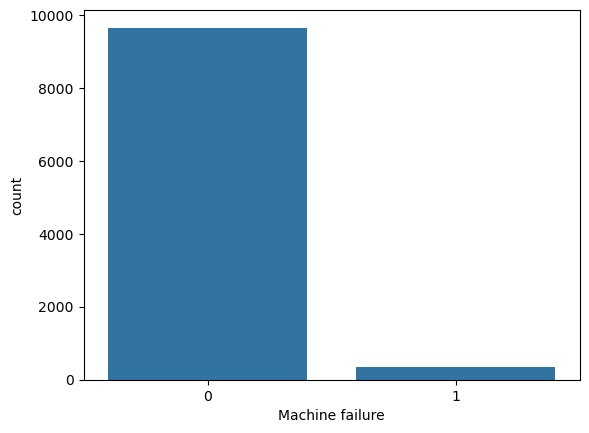

In [20]:
sns.countplot(x = 'Machine failure', data = df)

In [17]:
category_failure = df['type_of_failure'].value_counts()
df_length = len(df)
category_percentage = (category_failure/df_length)*100
category_percentage

type_of_failure
No failure    96.52
HDF            1.15
PWF            0.91
OSF            0.78
TWF            0.46
RNF            0.18
Name: count, dtype: float64

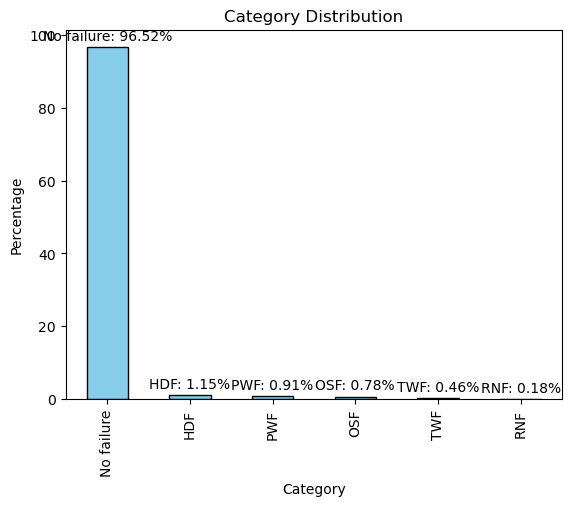

In [27]:
category = df['type_of_failure'].value_counts()
category_percentages = (category/category.sum())*100
ax = category_percentages.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Percentage')

# Annotate the bars with category names and percentages
for i, (index, percentage) in enumerate(category_percentages.items()):
    ax.text(i, percentage + 1, f'{index}: {percentage:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()

## Question 2.

<Axes: xlabel='Type', ylabel='count'>

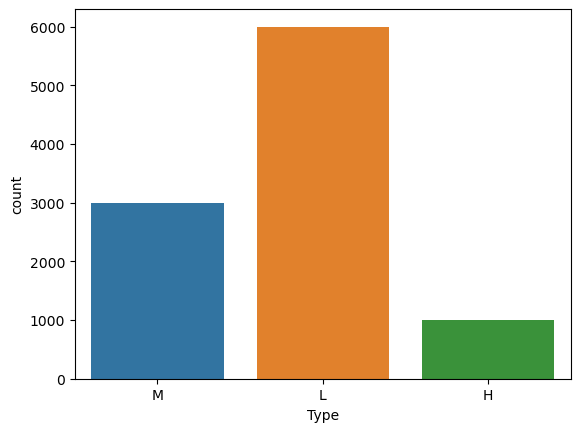

In [32]:
sns.countplot(x = 'Type', data = df,  hue = 'Type')

## Question 3.
What is the range of values for the continuous variables 'air temperature', 'process temperature', 'rotational speed', 'torque', and 'tool wear'? Are there any outliers in the dataset?

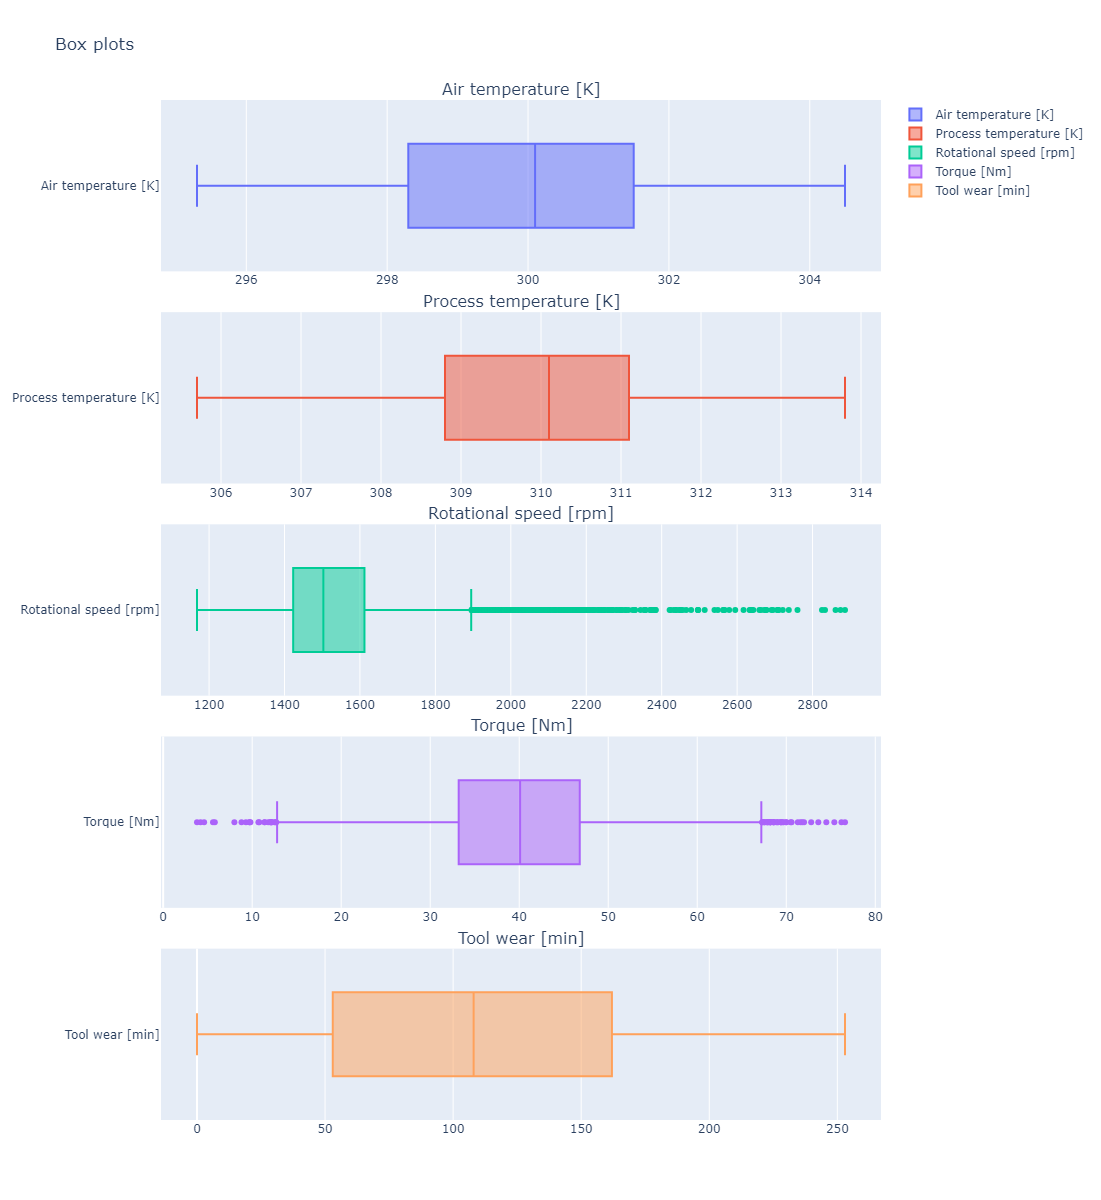

In [33]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

num_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

fig = make_subplots(rows=5, cols=1, subplot_titles=num_cols, vertical_spacing=0.04)


for i, col in enumerate(num_cols):
    box_plot = go.Box(x=df[col], name=col)
    fig.add_trace(box_plot, row=i+1, col=1)

fig.update_layout(
    title="Distribution of Numerical Features",
    height=1200,
    width=900,
    title_text="Box plots"
)

## Question 4.
Is there any correlation between the continuous variables and the 'machine failure' label? For example, does the tool wear increase the likelihood of machine failure? 

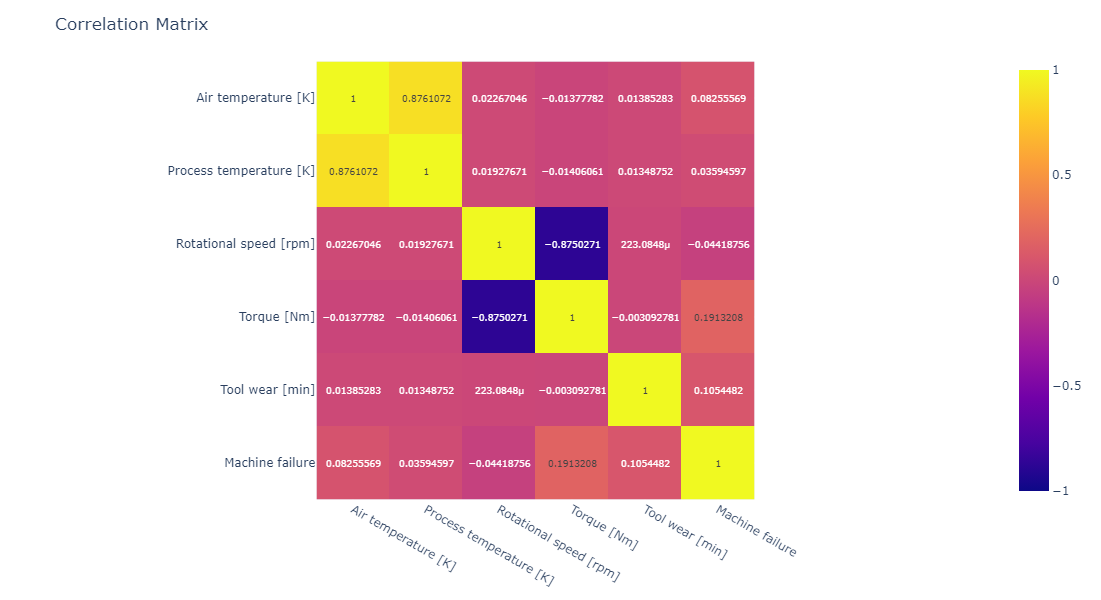

In [43]:
import plotly.express as px
corr_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']].corr()

fig = px.imshow(corr_matrix, zmin=-1, zmax=1, text_auto=True)

fig.update_layout(
    title='Correlation Matrix',
    height=600,
    width=800
)

fig.show()

Null Hypothesis: There is no signifcant relationship between the different columns and Machine Failure.

Alternate Hypothesis: There is a significant relationship between the tool wear and the machine failure label.

In [44]:
from scipy.stats import ttest_ind

test_cols = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']
values = []

for col in test_cols:
    failed = df[df['Machine failure'] == 1][col]
    non_failed = df[df['Machine failure'] == 0][col]

    t, p = ttest_ind(failed, non_failed)
    values.append([t, p])

values = pd.DataFrame(values, columns=['test-statistic', 'p-value'], index=test_cols)
alpha = 0.05
values['Hypothesis'] = values['p-value'].apply(lambda p: 'Reject null hypothesis' if p < alpha else 'Accept null hypothesis')
values

test-statistic       p-value              Hypothesis
Air temperature [K]            8.283018  1.354800e-16  Reject null hypothesis
Process temperature [K]        3.596562  3.240058e-04  Reject null hypothesis
Rotational speed [rpm]        -4.422634  9.853543e-06  Reject null hypothesis
Torque [Nm]                   19.490196  4.573805e-83  Reject null hypothesis
Tool wear [min]               10.602881  3.976076e-26  Reject null hypothesis

Using a t-test helps you objectively assess whether differences in measurements between two groups are meaningful. It provides a statistical basis for understanding which factors might contribute to machine failure and supports data-driven decision-making in improving machine performance and reliability.

## Question 5.
Is there any correlation between the categorical variable 'Type' and the continuous variables? For example, is the 'rotational speed' higher for high-quality products than for low-quality products? 

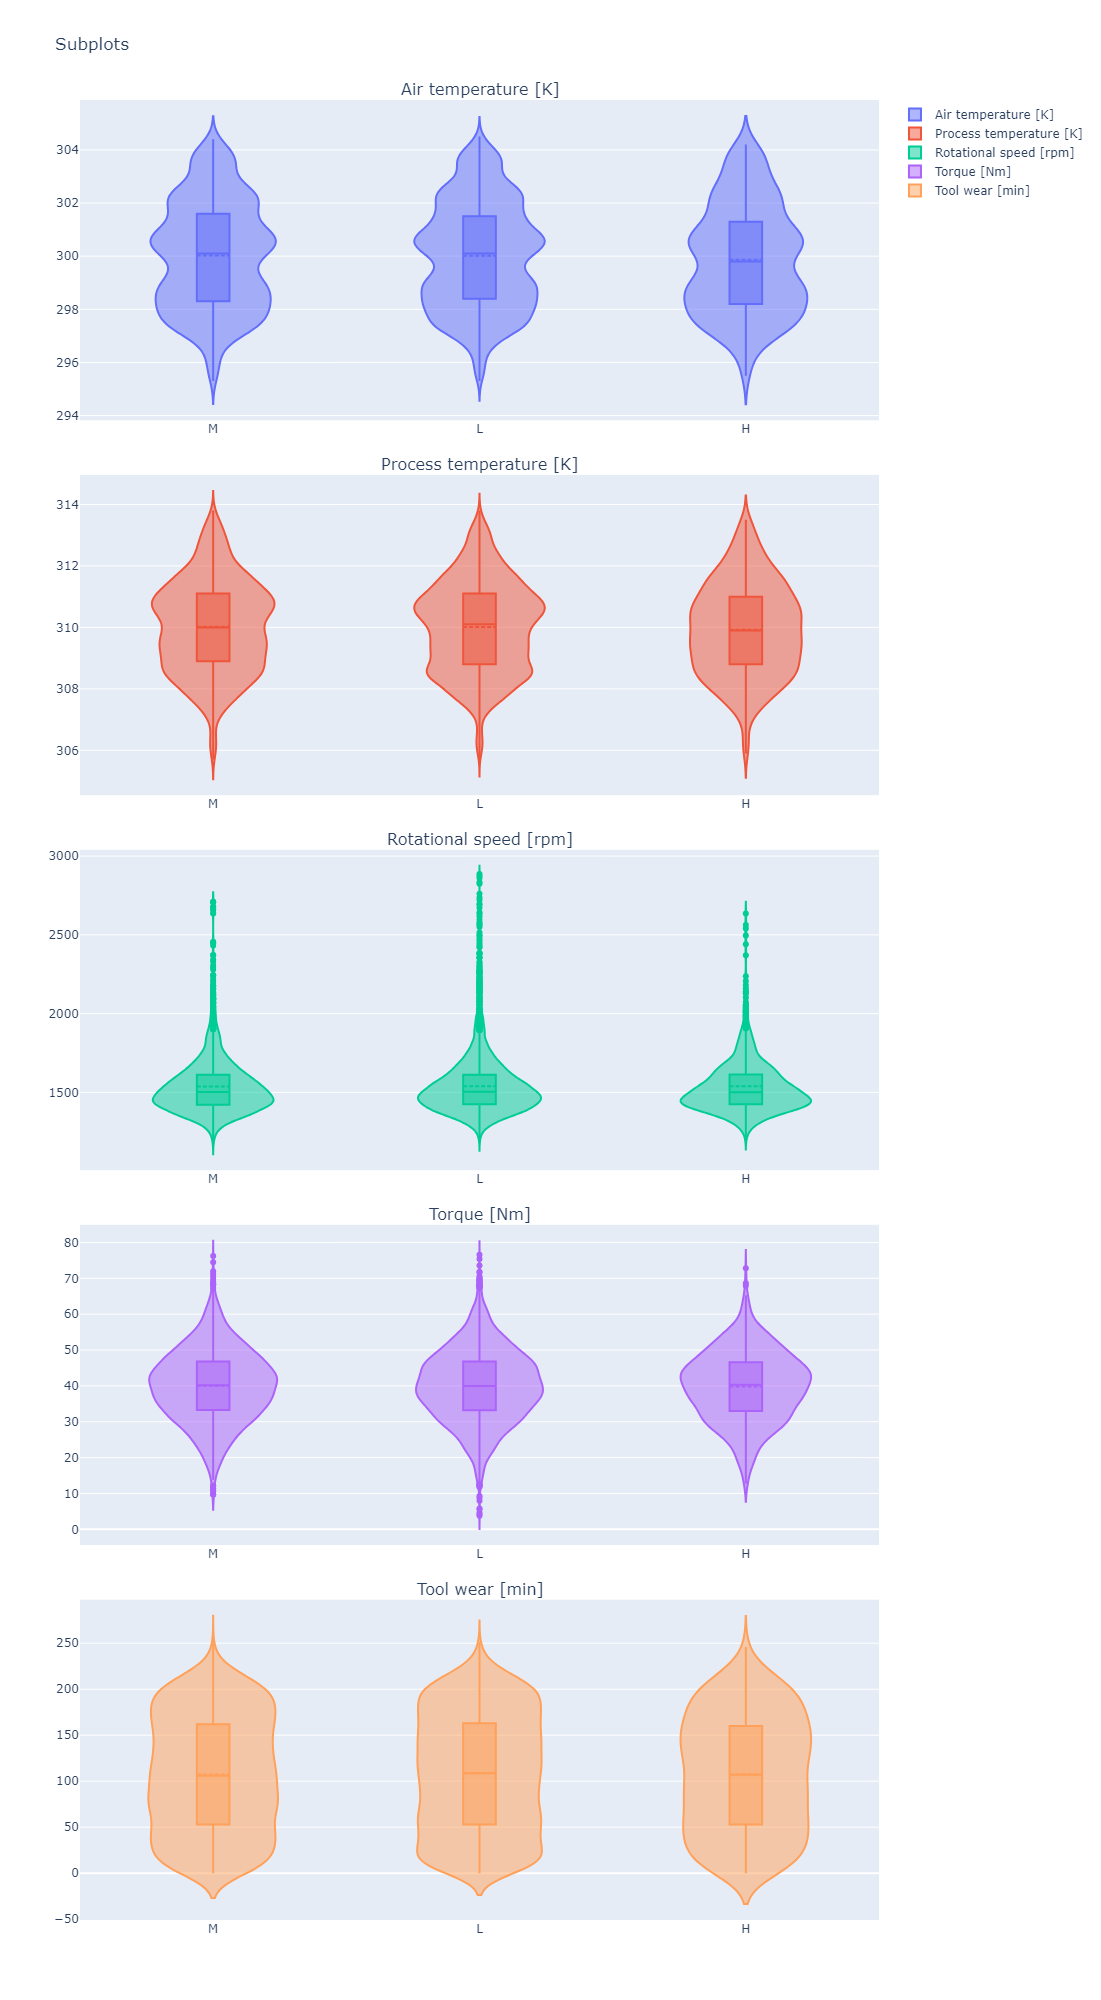

In [45]:
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
num_cols = ['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']
fig = make_subplots(rows=5, cols=1, subplot_titles=num_cols, vertical_spacing=0.03, horizontal_spacing=0.01)

for i, col in enumerate(num_cols):
    violin_trace = go.Violin(x=df['Type'], y=df[col],name=col,  box_visible=True, meanline_visible=True)
    fig.add_trace(violin_trace, row=i+1, col=1)

fig.update_layout(height=2000, width=800, title_text="Subplots")

fig.show()

Process Temperature seems to have an effect on high quality variant machines. Therefore we can say that Process Temperature is correlated with machine type.

## Question 6.
Are there any interactions or non-linear relationships between the variables that may be relevant for predictive maintenance? For example, does the torque increase exponentially with the rotational speed?

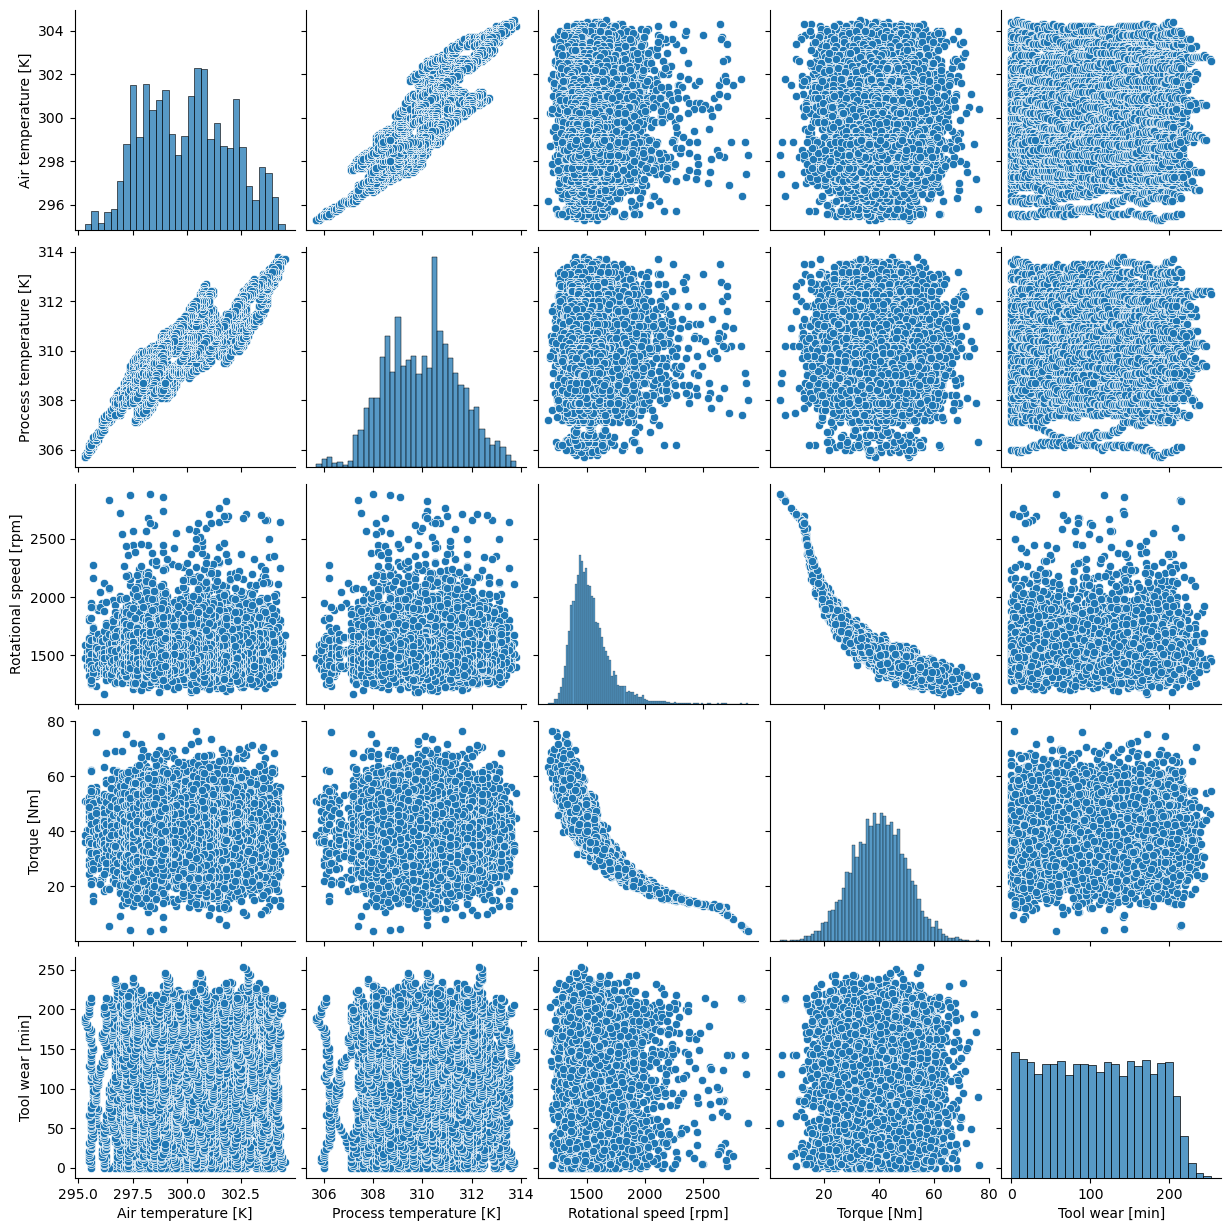

In [46]:
num_cols = df[['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']]
sns.pairplot(num_cols)

Among all possible combinations of continuous variables, Rotational Speed vs Torque have a negative correlation and process temperature vs air temperature have a positive correlation.